# 15 min Intro to Persistent Homology
### <a href="https://ben300694.github.io/" target="_blank">Benjamin Matthias Ruppik</a>, Max-Planck Institute for Mathematics, Bonn

## Filtrations of topological spaces and homology groups

A lot of topological spaces $X$ come with a natural filtration,
that is, an exhaustion by subsets $U_{i}$ with the property
that for $i < j$ we have $U_{i} \subseteq U_{j}$

<img src="img/surface_morse_position.jpg" width=400 title="Surface of genus 2 in Morse position with 3 minima, 7 saddles, 2 maxima"/>

## Importing and preprocessing the data

We get our data - a graph representing a social network - from https://networkrepository.com/index.php



In [20]:
import pandas
import gudhi
from pylab import *

In [34]:
toy_matrix_1 = [[0,1,1,2,3],
                [1,0,1,1,2],
                [1,1,0,1,2],
                [2,1,1,0,1],
                [3,2,2,1,0]]
toy_matrix_2 = [[0,1,1,2,inf],
                [1,0,2,1,inf],
                [1,2,0,1,inf],
                [2,1,1,0,inf],
                [inf, inf, inf, inf, 0]]

## Applying persistent homology to the data

persist = to stick around for a long time

homology = cycles module boundaries

persistent homology measures non-trivial cycles which can be detected in significant parts ofthe filtrations

In [43]:
graph_distance_matrix_1 = toy_matrix_1
graph_distance_matrix_2 = toy_matrix_2

# Build Vietoris-Rips complex
skeleton_1 = gudhi.RipsComplex(
    distance_matrix = graph_distance_matrix_1,
    max_edge_length = 5.0
)
skeleton_2 = gudhi.RipsComplex(
    distance_matrix = graph_distance_matrix_2,
    max_edge_length = 5.0
)


Rips_simplex_tree_1 = skeleton_1.create_simplex_tree(max_dimension = 3)
Rips_simplex_tree_2 = skeleton_2.create_simplex_tree(max_dimension = 3)

In [44]:
# Compute persistence of the simplex tree
BarCodes_Rips_1 = Rips_simplex_tree_1.persistence()
BarCodes_Rips_2 = Rips_simplex_tree_2.persistence()

In [48]:
print(BarCodes_Rips_1)
print(BarCodes_Rips_2)

[(0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]
[(1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


In [51]:
Rips_simplex_tree_1.persistence_intervals_in_dimension(0)

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0., inf]])

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

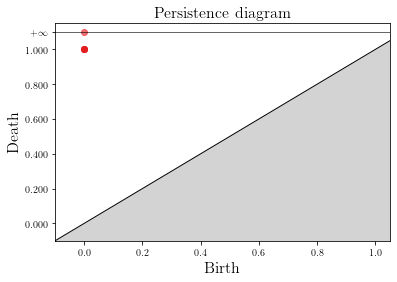

In [49]:
gudhi.plot_persistence_diagram(BarCodes_Rips_1)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

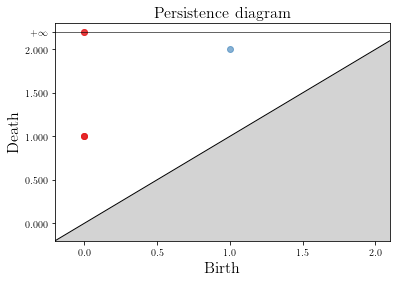

In [50]:
gudhi.plot_persistence_diagram(BarCodes_Rips_2)

## Conclusion

In [56]:
# Comparing different persistence diagrams using the bottleneck distance
persistence_interval_dim_1_1 = Rips_simplex_tree_1.persistence_intervals_in_dimension(1)
persistence_interval_dim_1_2 = Rips_simplex_tree_2.persistence_intervals_in_dimension(1)

In [57]:
gudhi.bottleneck_distance(persistence_interval_dim_1_1, persistence_interval_dim_1_2)

0.5

### Properties of the data we could detect with persistent homology

 * qualitative data about large scale features
 * **TODO**

### Drawbacks of using persistent homology
 * have to deal with noise in the data, for example, points close to the diagonal in the persistence diagram only appear for a short time
 * **TODO**

### References

 * Bot Detection on Social Networks Using Persistent Homology: https://www.semanticscholar.org/paper/Bot-Detection-on-Social-Networks-Using-Persistent-Nguyen-Aktas/e3944fac408415965b3d24d52d3ac7b7a0e9aa17
 * Persistent Homology of Collaboration Networks: https://www.hindawi.com/journals/mpe/2013/815035/
 
 * An introduction to Topological Data Analysis: fundamental and practical aspects for data scientists: https://arxiv.org/abs/1710.04019
 
 
### Python libraries used

#### TDA tools

 * [GUDHI Python module](https://gudhi.inria.fr/)
 * https://github.com/GUDHI/TDA-tutorial

#### Graphs

 * https://networkx.org/



### Datasets
 
 @inproceedings{nr,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={https://networkrepository.com},
      year={2015}
 }
